In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [10]:
df= pd.read_excel(r"C:\Users\kezer\Projects\amazon-nlp\amazon.xlsx", index_col=False)
df

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...
...,...,...,...,...
5606,4,0,Recommend,Great product for reasonable money. Delivered...
5607,5,0,"Terrible , different colors. I returned",Color is way off and panels do not match
5608,5,0,Extremely pleasing,These are great for my studio as they compleme...
5609,5,0,Perfect,Brought out the beauty in kids room. They love...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [13]:
# TEXT PRE-PROCESSING
# Normalizing Case Folding

df['Review'] = df['Review'].str.lower()
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [14]:
# Punctuations
df['Review']= df['Review'].str.replace('[^\w\s]',' ')
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [15]:
#numbers
df['Review']= df['Review'].str.replace('\d',' ')
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [16]:
# Stopwords
# nltk.download('stopwords')
sw = stopwords.words('english')
df['Review']= df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["Review"]

0                                                   happy
1       good quality material however panels mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                               color way panels match
5608    great studio complement entire theme studio/li...
5609                   brought beauty kids room. love it.
5610    cute curtains sons room! thick enough keep lig...
Name: Review, Length: 5611, dtype: object

In [18]:
# Rarewords / Custom Words 
sil = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
df['Review']= df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sil))
df['Review']

0                                                   happy
1       good quality material however panels mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                               color way panels match
5608    great studio complement entire theme area. pho...
5609                   brought beauty kids room. love it.
5610    cute curtains sons room! thick enough keep lig...
Name: Review, Length: 5611, dtype: object

In [19]:
# Lemmatization(normalleştirme)(kök)
# nltk.download('wordnet')
df['Review']= df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review']


0                                                   happy
1        good quality material however panel mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                                color way panel match
5608    great studio complement entire theme area. pho...
5609                    brought beauty kid room. love it.
5610    cute curtain son room! thick enough keep light...
Name: Review, Length: 5611, dtype: object

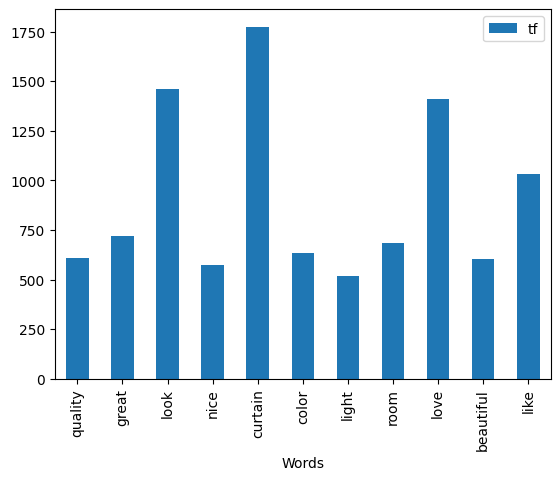

In [20]:
# # Görev 2: Metin Görselleştirme
# Barplot
tf = df['Review'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns= ["Words","tf"]
tf[tf["tf"]>500].plot.bar(x='Words',y='tf')
plt.show()

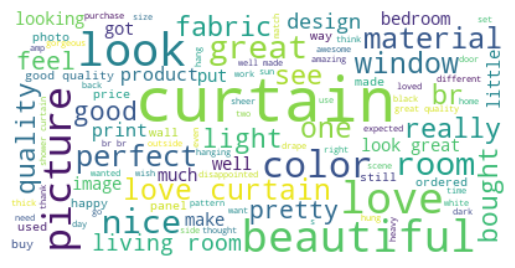

In [22]:
# Wordcloud
text = " ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
# Görev 3: Duygu Analizi
# Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [47]:

# Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarının incelenmesi
df['Review'][0:10].apply(lambda x: sia.polarity_scores(x))
df['Review'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Review'][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)['compound']> 0 else "neg")
df["sentiment_label"] = df['Review'].apply(lambda x: "pos" if sia.polarity_scores(x)['compound']> 0 else "neg")
df.groupby("sentiment_label")["Star"].mean()

sentiment_label
neg   3.45
pos   4.57
Name: Star, dtype: float64

NOT:SentimentIntensityAnalyzer ile yorumları etiketleyerek, yorum sınıflandırma makine öğrenmesi modeli için bağımlı değişken oluşturulmuş oldu.


In [49]:
# GÖREV 4: Makine öğrenmesine hazırlık!
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["sentiment_label"],
                                                    random_state=42)


In [50]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [52]:
# Görev 5: Modelleme (Lojistik Regresyon)
# Adım 1: Lojistik regresyon modelini kurarak train dataları ile fit ediniz.

log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

y_pred = log_model.predict(x_test_tf_idf_word)

print(classification_report(y_pred, test_y))

cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()


              precision    recall  f1-score   support

         neg       0.31      0.97      0.47        72
         pos       1.00      0.89      0.94      1331

    accuracy                           0.89      1403
   macro avg       0.66      0.93      0.71      1403
weighted avg       0.96      0.89      0.91      1403



0.8538891713268937

In [53]:
# Adım 3: Veride bulunan yorumlardan ratgele seçerek modele sorulması.
random_review = pd.Series(df["Review"].sample(1).values)
yeni_yorum = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model.predict(yeni_yorum)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  little cheap looking add amazing touch guestroom. 
 Prediction: ['pos']


In [54]:
# Görev 6: Modelleme (Random Forest)
# Adım 1: Random Forest modeliiletahminsonuçlarınıngözlenmesi;

rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.898784951703101